In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import os
import h5py as hdf
import scipy as scp

plt.rcParams['figure.facecolor'] = 'white'
import os
import re

def gather_files_regex(dir: str,regex)->list:
    '''
    Gathers all files below a directory that match the provided regular expression
    Traverses into sub-directories

    dir -- the directory

    regex -- A regular expression to match filenames
    '''
    subdir=dir
    p = re.compile(regex)
    data=[]
    for dir, _, files in os.walk(subdir):
        for name in files:
            if p.match(name):
                b=(str(os.path.join(dir, name)))
                data.append(b)
    return data

In [26]:
files=gather_files_regex('Y:\\Istra Repositories\\ch-gr_exports',r'\w+B\w+[v]\w{0,4}.pickle\Z')
display(files)

['Y:\\Istra Repositories\\ch-gr_exports\\QL_B_8yiv.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\QL_B_8yv.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\QL_B_8yvi.pickle']

In [27]:
sample=files[0]
def load_clip_save(samplelocation):
    df=pd.read_pickle(samplelocation,compression='zip')
    cliplist=[
        (     'add_data',             'analog_channels'),
            (  'coordinates',                'coordinate_x'),
            (  'coordinates',                'coordinate_y'),
            (  'coordinates',                'coordinate_z'),
            ('displacements',          'displacement_total'),
            (      'strains',                   'strain_p1'),
            (      'strains',                   'strain_p2'),
            (      'strains',                   'strain_xx'),
            (      'strains',                   'strain_xy'),
            (      'strains',                   'strain_yy'),

    ]
    dfn=df[cliplist]
    newsamplelocation=samplelocation.split('.')[0]+'_clipped.pickle'
    dfn.to_pickle(newsamplelocation,compression='zip')
load_clip_save(sample)
df=pd.read_pickle('Y:\\Istra Repositories\\ch-gr_exports\\MC_A_6xi_clipped.pickle',compression='zip')

In [28]:
for file in files:
    load_clip_save(file)

In [29]:
f=pd.DataFrame({'k':np.arange(-35,35,2)})
f['h']=f['k']+2
f=f.astype(str)
f['str']=r"tests_df['"+f['k']+'_'+f['h']+r"']"
display(f.astype(str))
display(f.str)

,k,h,str
0,-35,-33,tests_df['-35_-33']
1,-33,-31,tests_df['-33_-31']
2,-31,-29,tests_df['-31_-29']
3,-29,-27,tests_df['-29_-27']
4,-27,-25,tests_df['-27_-25']
5,-25,-23,tests_df['-25_-23']
6,-23,-21,tests_df['-23_-21']
7,-21,-19,tests_df['-21_-19']
8,-19,-17,tests_df['-19_-17']
9,-17,-15,tests_df['-17_-15']


0     tests_df['-35_-33']
1     tests_df['-33_-31']
2     tests_df['-31_-29']
3     tests_df['-29_-27']
4     tests_df['-27_-25']
5     tests_df['-25_-23']
6     tests_df['-23_-21']
7     tests_df['-21_-19']
8     tests_df['-19_-17']
9     tests_df['-17_-15']
10    tests_df['-15_-13']
11    tests_df['-13_-11']
12     tests_df['-11_-9']
13      tests_df['-9_-7']
14      tests_df['-7_-5']
15      tests_df['-5_-3']
16      tests_df['-3_-1']
17       tests_df['-1_1']
18        tests_df['1_3']
19        tests_df['3_5']
20        tests_df['5_7']
21        tests_df['7_9']
22       tests_df['9_11']
23      tests_df['11_13']
24      tests_df['13_15']
25      tests_df['15_17']
26      tests_df['17_19']
27      tests_df['19_21']
28      tests_df['21_23']
29      tests_df['23_25']
30      tests_df['25_27']
31      tests_df['27_29']
32      tests_df['29_31']
33      tests_df['31_33']
34      tests_df['33_35']
Name: str, dtype: object

In [35]:

positions=pd.read_excel('Y:\\Istra Repositories\\ch-gr_exports\\Querzug_overview.xlsx')
positions.name=positions.name+'_clipped'
positions=positions.iloc[:,1:].set_index('name')
positions.dropna(axis=0,inplace=True)
positions=positions.astype(int)
display(positions)

,ok,crack,pos,left_12-5,step_start,step_stop
name,,,,,,
MC_A_6xi_clipped,1,135,143,123,110,230
MC_A_6xiii_clipped,1,115,119,99,45,187
MC_A_8xiii_clipped,1,170,117,97,32,355
MC_B_6xi_clipped,1,142,142,122,77,162
MC_B_6xii_clipped,1,122,121,101,27,160
MC_B_6xiii_clipped,1,90,90,70,37,172
MC_B_8xi_clipped,1,144,141,121,127,299
MC_B_8xiii_clipped,1,100,93,73,32,215
MC_B_8yi_clipped,2,110,112,92,30,799


In [36]:
def load_cut_save(samplelocation):
    name=samplelocation.split('\\')[-1].split('.')[0]
    df=pd.read_pickle(samplelocation,compression='zip')
    dfn=df.iloc[positions.loc[name,'step_start']:positions.loc[name,'step_stop'],:].copy()
    newsamplelocation=samplelocation.split('.')[0]+'_cut.pickle'
    dfn.to_pickle(newsamplelocation,compression='zip')

#load_cut_save('Y:\\Istra Repositories\\ch-gr_exports\\MC_A_6xi_clipped.pickle')

In [37]:
files=gather_files_regex('Y:\\Istra Repositories\\ch-gr_exports',r'\w+[^d]_clipped.pickle\Z')
display(files)

['Y:\\Istra Repositories\\ch-gr_exports\\MC_A_6xiii_clipped.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_6xi_clipped.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_6yiii_clipped.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_6yii_clipped.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_6yi_clipped.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_8xiii_clipped.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_8xii_clipped.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_8xi_clipped.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_8yii_clipped.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_A_8yi_clipped.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_B_6xiii_clipped.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_B_6xii_clipped.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_B_6xi_clipped.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_B_6yiii_clipped.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\MC_B_6y

In [42]:
for file in positions.index[-7:-1]:
    display(file)
    name='Y:\\Istra Repositories\\ch-gr_exports\\'+file+'.pickle'
    load_cut_save(name)

'QL_GW_8yii_clipped'

'QL_A_8yiv_clipped'

'QL_A_8yv_clipped'

'QL_A_8yvi_clipped'

'QL_B_8yiv_clipped'

'QL_B_8yv_clipped'

In [45]:

files=gather_files_regex('Y:\\Istra Repositories\\ch-gr_exports',r'\w+[v]\w*_clipped_cut.pickle\Z')
display(files)

['Y:\\Istra Repositories\\ch-gr_exports\\QL_A_8yiv_clipped_cut.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\QL_A_8yvi_clipped_cut.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\QL_A_8yv_clipped_cut.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\QL_B_8yiv_clipped_cut.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\QL_B_8yvi_clipped_cut.pickle',
 'Y:\\Istra Repositories\\ch-gr_exports\\QL_B_8yv_clipped_cut.pickle']

In [119]:
df=pd.read_pickle(files[0],compression='zip')


In [46]:
df.columns
def array_get_mask(array:np.ndarray)->pd.DataFrame:
    df=pd.DataFrame(array)
    after=df.copy()
    after[after==0.]=np.nan
    after=np.divide(after,after)
    return(after)

def df_apply_mask(arr:np.ndarray,mask:np.ndarray)-> pd.DataFrame:
    after=np.multiply(arr,mask)
    after=pd.DataFrame(after)
    after.dropna(how='all',axis=0,inplace=True)
    after.dropna(how='all',axis=1,inplace=True)
    return(after)

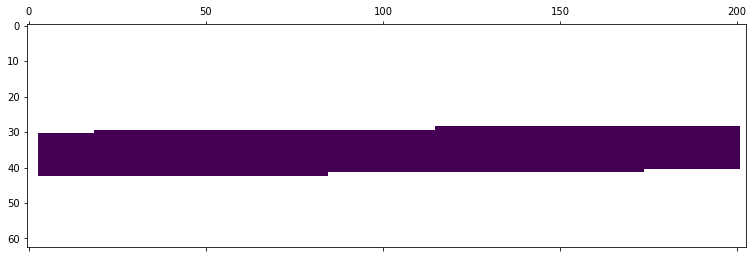

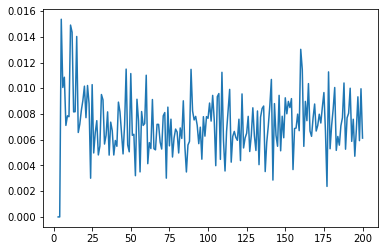

In [47]:
def df_line_mean(arr,mask):
    cf=df_apply_mask(arr,mask)
    exdf=cf.mean(axis=0)
    return exdf
mask=array_get_mask(df[(      'strains',          'strain_p1')][10])
af=df[(      'strains',          'strain_p1')][140]
plt.matshow(mask)
plt.show()
plt.plot(df_line_mean(af,mask))

Y:\Istra Repositories\ch-gr_exports\QL_A_8yiv_clipped_cut_lined.pickle


('coordinates', 'coordinate_x')

('coordinates', 'coordinate_x')
('coordinates', 'coordinate_y')
('coordinates', 'coordinate_z')
('displacements', 'displacement_total')
('strains', 'strain_p1')
('strains', 'strain_p2')
('strains', 'strain_xx')
('strains', 'strain_xy')
('strains', 'strain_yy')
QL_A_8yiv_clipped_cut


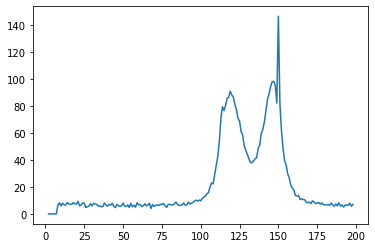

Y:\Istra Repositories\ch-gr_exports\QL_A_8yvi_clipped_cut_lined.pickle


('coordinates', 'coordinate_x')

('coordinates', 'coordinate_x')
('coordinates', 'coordinate_y')
('coordinates', 'coordinate_z')
('displacements', 'displacement_total')
('strains', 'strain_p1')
('strains', 'strain_p2')
('strains', 'strain_xx')
('strains', 'strain_xy')
('strains', 'strain_yy')
QL_A_8yvi_clipped_cut


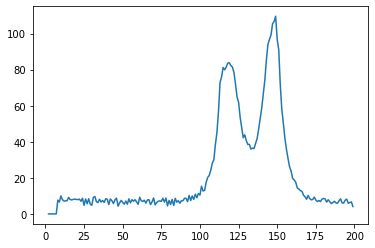

Y:\Istra Repositories\ch-gr_exports\QL_A_8yv_clipped_cut_lined.pickle


('coordinates', 'coordinate_x')

('coordinates', 'coordinate_x')
('coordinates', 'coordinate_y')
('coordinates', 'coordinate_z')
('displacements', 'displacement_total')
('strains', 'strain_p1')
('strains', 'strain_p2')
('strains', 'strain_xx')
('strains', 'strain_xy')
('strains', 'strain_yy')
QL_A_8yv_clipped_cut


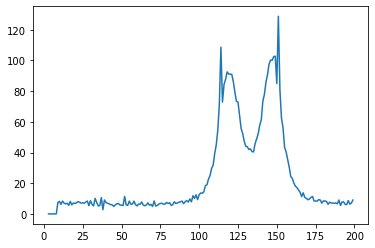

Y:\Istra Repositories\ch-gr_exports\QL_B_8yiv_clipped_cut_lined.pickle


('coordinates', 'coordinate_x')

('coordinates', 'coordinate_x')
('coordinates', 'coordinate_y')
('coordinates', 'coordinate_z')
('displacements', 'displacement_total')
('strains', 'strain_p1')
('strains', 'strain_p2')
('strains', 'strain_xx')
('strains', 'strain_xy')
('strains', 'strain_yy')
QL_B_8yiv_clipped_cut


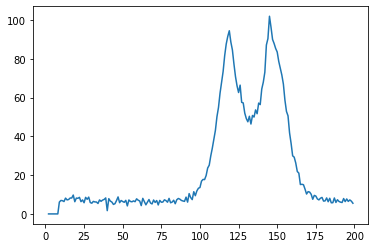

Y:\Istra Repositories\ch-gr_exports\QL_B_8yvi_clipped_cut_lined.pickle


('coordinates', 'coordinate_x')

('coordinates', 'coordinate_x')
('coordinates', 'coordinate_y')
('coordinates', 'coordinate_z')
('displacements', 'displacement_total')
('strains', 'strain_p1')
('strains', 'strain_p2')
('strains', 'strain_xx')
('strains', 'strain_xy')
('strains', 'strain_yy')
QL_B_8yvi_clipped_cut


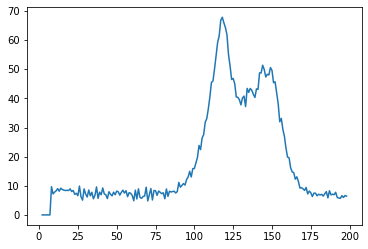

Y:\Istra Repositories\ch-gr_exports\QL_B_8yv_clipped_cut_lined.pickle


('coordinates', 'coordinate_x')

('coordinates', 'coordinate_x')
('coordinates', 'coordinate_y')
('coordinates', 'coordinate_z')
('displacements', 'displacement_total')
('strains', 'strain_p1')
('strains', 'strain_p2')
('strains', 'strain_xx')
('strains', 'strain_xy')
('strains', 'strain_yy')
QL_B_8yv_clipped_cut


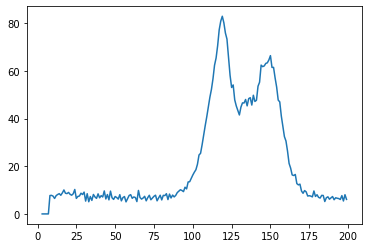

In [48]:
def load_line_mean_save(path):
    name=path.split('\\')[-1].split('.')[0]
    expath=path.split('.')[0]+'_lined.pickle'
    print(expath)
    df=pd.read_pickle(path,compression='zip')
    mask=array_get_mask(df[(      'strains',          'strain_p1')][10])
    coliterator=df.columns[1:]
    idxiterator=df.index
    display(coliterator[0])
    ndf=df.copy()
    for col in coliterator:
        colt=[]#
        print(col)
        for idx in idxiterator:
            #print('__',idx)
            colt.append(df_line_mean(df.loc[idx,col],mask))
        #display(colt)
        ndf[col]=colt
    #display(ndf)
    print(name)
    plt.plot(ndf[(      'strains',          'strain_p1')][len(ndf.index)-10])
    plt.show()
    ndf.to_pickle(expath,compression='zip')
for file in files:
    load_line_mean_save(file)

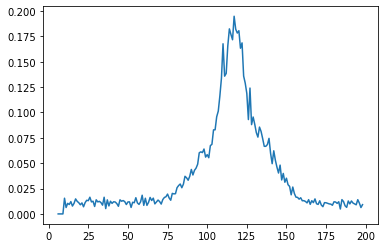

In [140]:
#plt.plot(ndf[('strains',        'strain_p1')].iloc[len(ndf.index)-10])

In [141]:
display(ndf)

group                                                              add_data  \
dataset                                                     analog_channels   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  [[0.09190776926825261]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  [[0.13235060216106362]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  [[0.17575266754835314]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  [[0.21915473383687936]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  [[0.26124158690732924]]   
...                                                                     ...   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...    [[2.271877232701512]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...   [[2.2636571243347987]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...   [[2.2560946247485134]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...   [[2.2478745166229563]]   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...   [[2.2399832129400883]]   

group                                                                                     coordinates  \
dataset                                                                                  coordinate_x   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  6      33.722664
7      33.706459
8      33.68...   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  6      33.730224
7      33.714227
8      33.69...   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  6      33.737433
7      33.721509
8      33.70...   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  6      33.747082
7      33.730684
8      33.71...   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  6      33.755275
7      33.739394
8      33.72...   
...                                                                                               ...   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  6       0.000000
7       0.000000
8       0.00...   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  6       0.000000
7       0.000000
8       0.00...   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  6       0.000000
7       0.000000
8       0.00...   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  6       0.000000
7       0.000000
8       0.00...   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  6       0.000000
7       0.000000
8       0.00...   

group                                                                                                  \
dataset                                                                                  coordinate_y   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  6      35.249425
7      34.842790
8      34.43...   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  6      35.271475
7      34.865461
8      34.45...   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  6      35.292187
7      34.885658
8      34.47...   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  6      35.312162
7      34.906346
8      34.49...   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  6      35.332964
7      34.926668
8      34.52...   
...                                                                                               ...   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  6       0.000000
7       0.000000
8       0.00...   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  6       0.000000
7       0.000000
8       0.00...   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  6       0.000000
7       0.000000
8       0.00...   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  6       0.000000
7       0.000000
8       0.00...   
Y:\Istra Repositories\ch-gr_exports\MC_A_6xiii\...  6       0.000000
7       0.000000
8       0.00...   

group                                                                                                  \
dataset                                                                                  coordinate_z   
Y:\Istra Repositories\ch-gr_ex

In [142]:
display(ndf.columns)

MultiIndex([(     'add_data',    'analog_channels'),
            (  'coordinates',       'coordinate_x'),
            (  'coordinates',       'coordinate_y'),
            (  'coordinates',       'coordinate_z'),
            ('displacements', 'displacement_total'),
            (      'strains',          'strain_p1'),
            (      'strains',          'strain_p2'),
            (      'strains',          'strain_xx'),
            (      'strains',          'strain_xy'),
            (      'strains',          'strain_yy')],
           names=['group', 'dataset'])